In [1]:
!nvidia-smi

Tue Dec 24 13:25:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
# List all projects for your workspace
workspace = rf.workspace()
print(workspace)
workspace = rf.workspace("cvip-9m9lj")
project = workspace.project("cvip-jy1to")
version = project.version(5)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
{
  "name": "CVIP",
  "url": "cvip-9m9lj",
  "projects": [
    "cvip-9m9lj/cvip-jy1to"
  ]
}
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to CVIP-5 in yolov11:: 100%|██████████| 511/511 [00:00<00:00, 1189.02it/s]


In [5]:
print(dataset.location)

/content/datasets/CVIP-5


In [6]:
%cd {HOME}
!yolo task=detect mode=train model=yolo11s.pt data=/content/datasets/CVIP-5/data.yaml epochs=10 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 180MB/s]
New https://pypi.org/project/ultralytics/8.3.54 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/CVIP-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					   P_curve.png	     train_batch2.jpg
confusion_matrix_normalized.png			   PR_curve.png      val_batch0_labels.jpg
confusion_matrix.png				   R_curve.png	     val_batch0_pred.jpg
events.out.tfevents.1735046754.c632d7c60c24.946.0  results.csv	     val_batch1_labels.jpg
F1_curve.png					   results.png	     val_batch1_pred.jpg
labels_correlogram.jpg				   train_batch0.jpg  weights
labels.jpg					   train_batch1.jpg


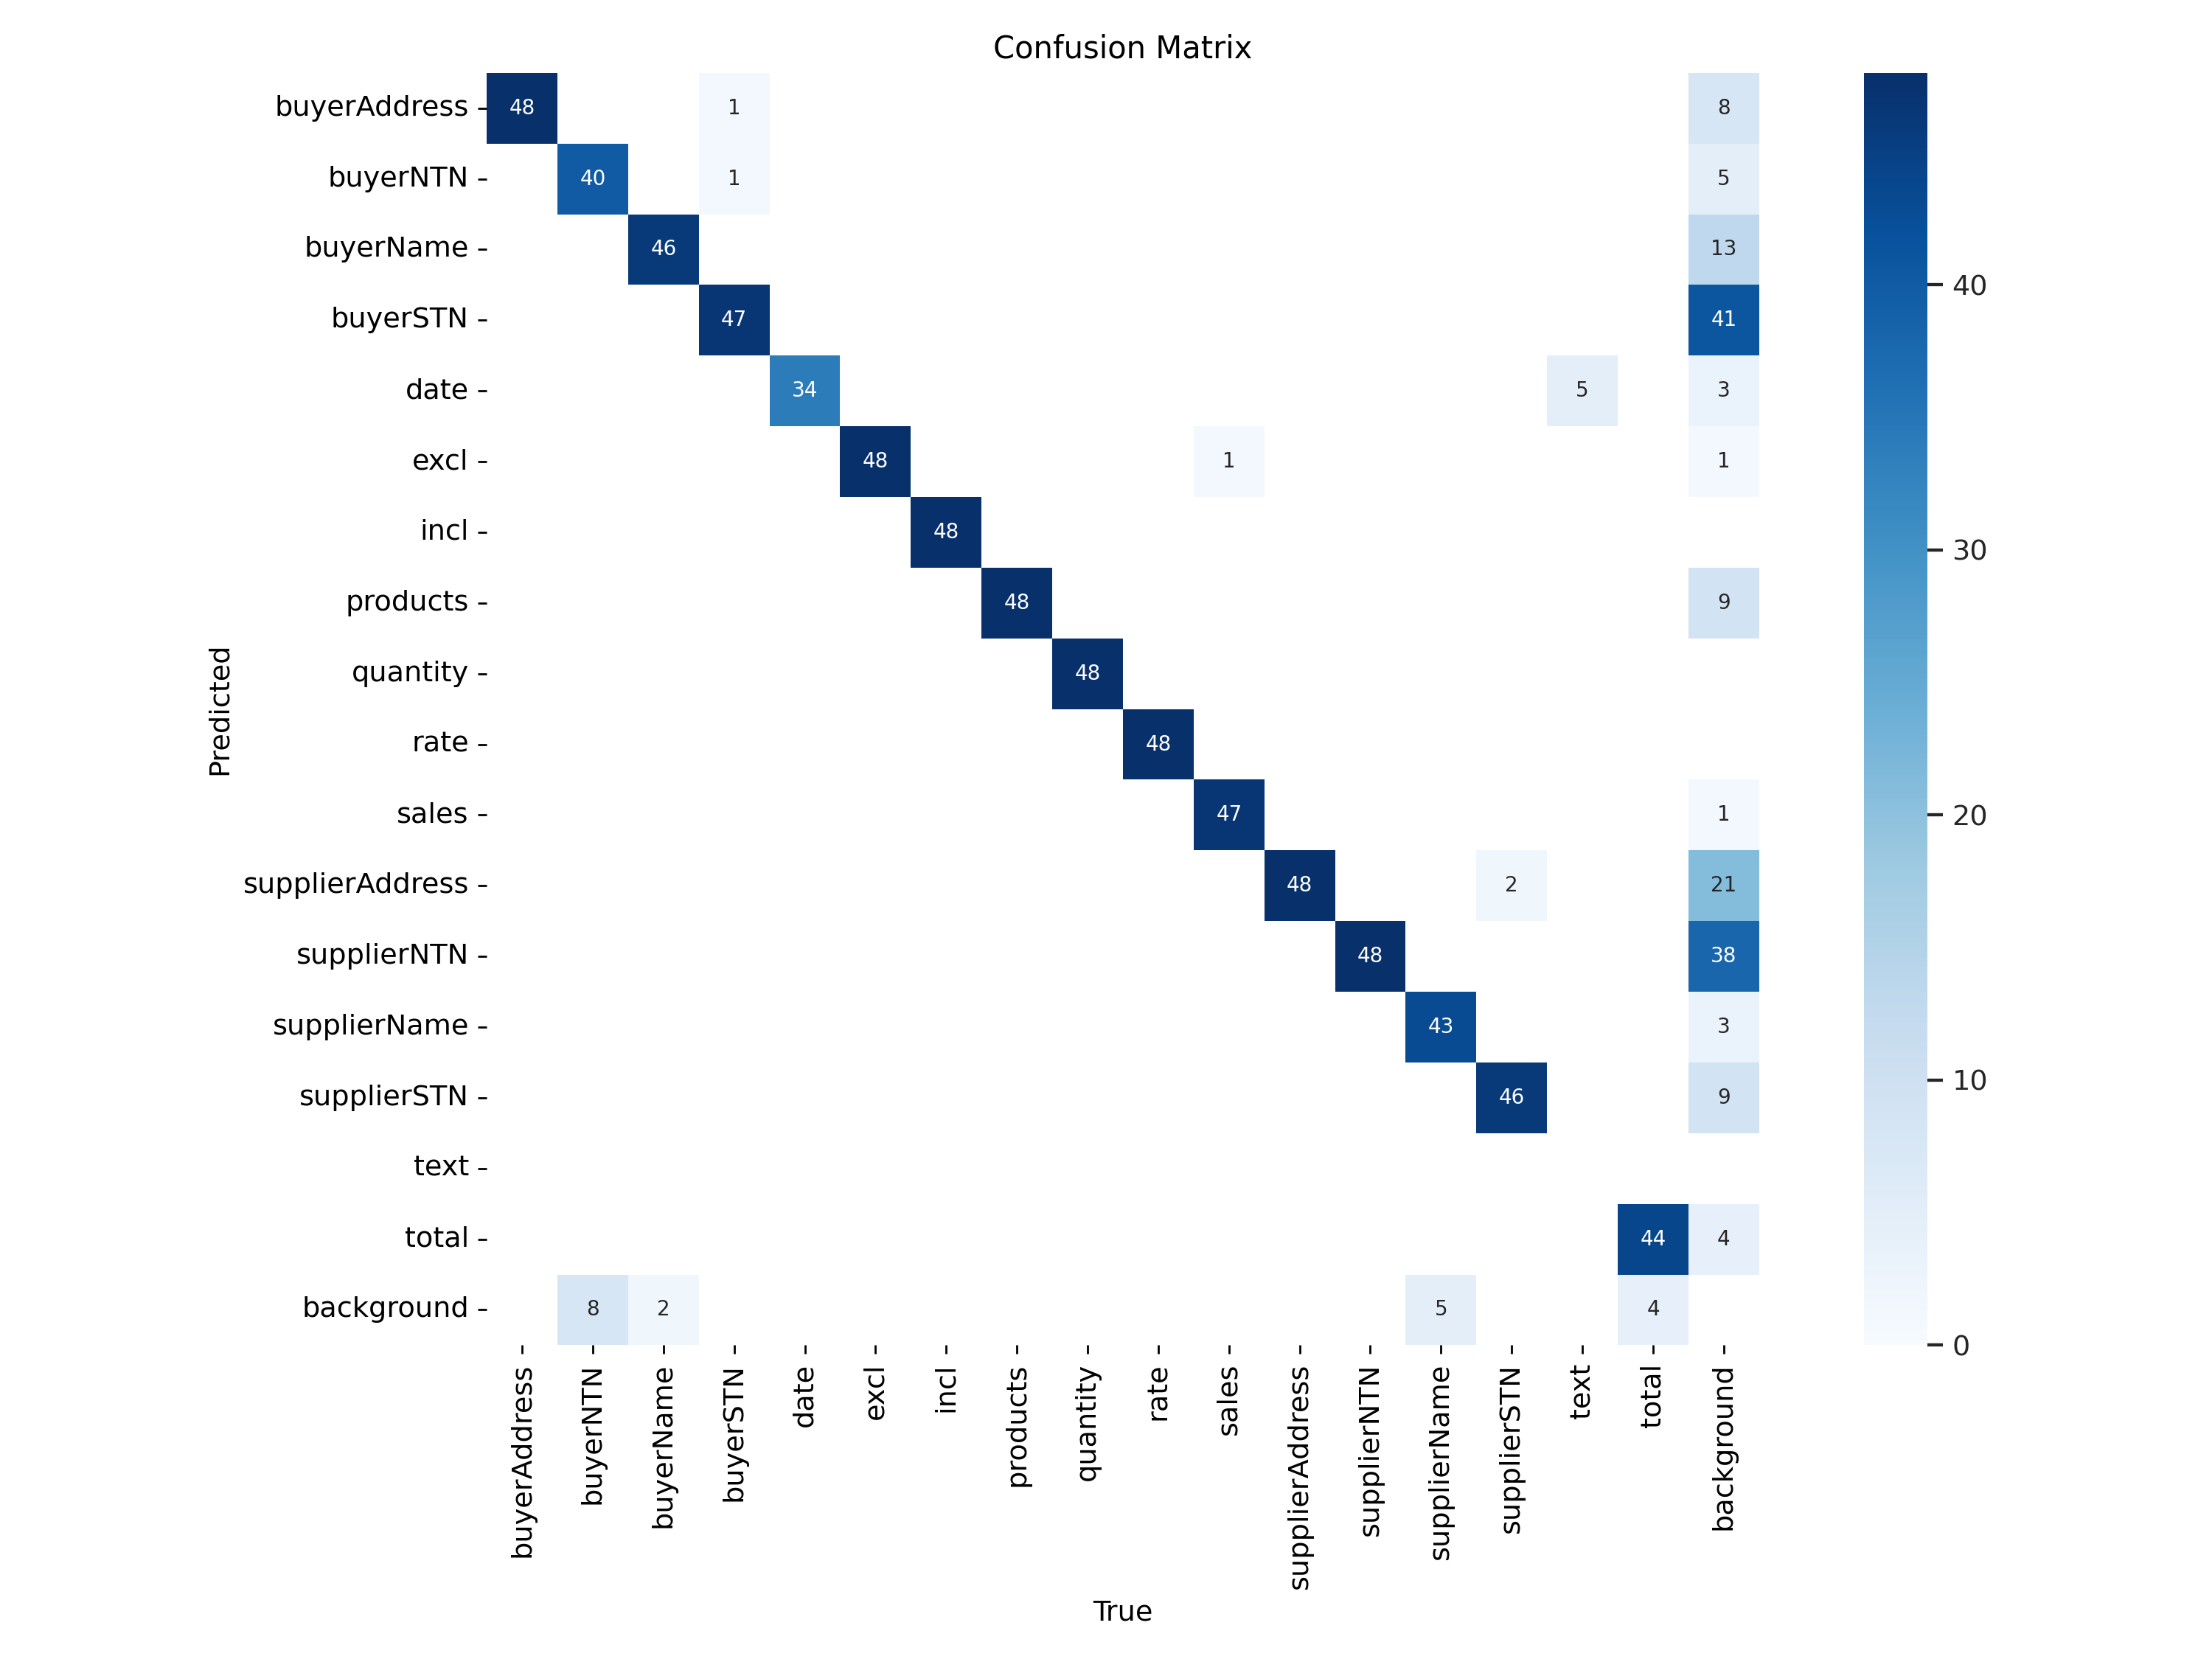

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

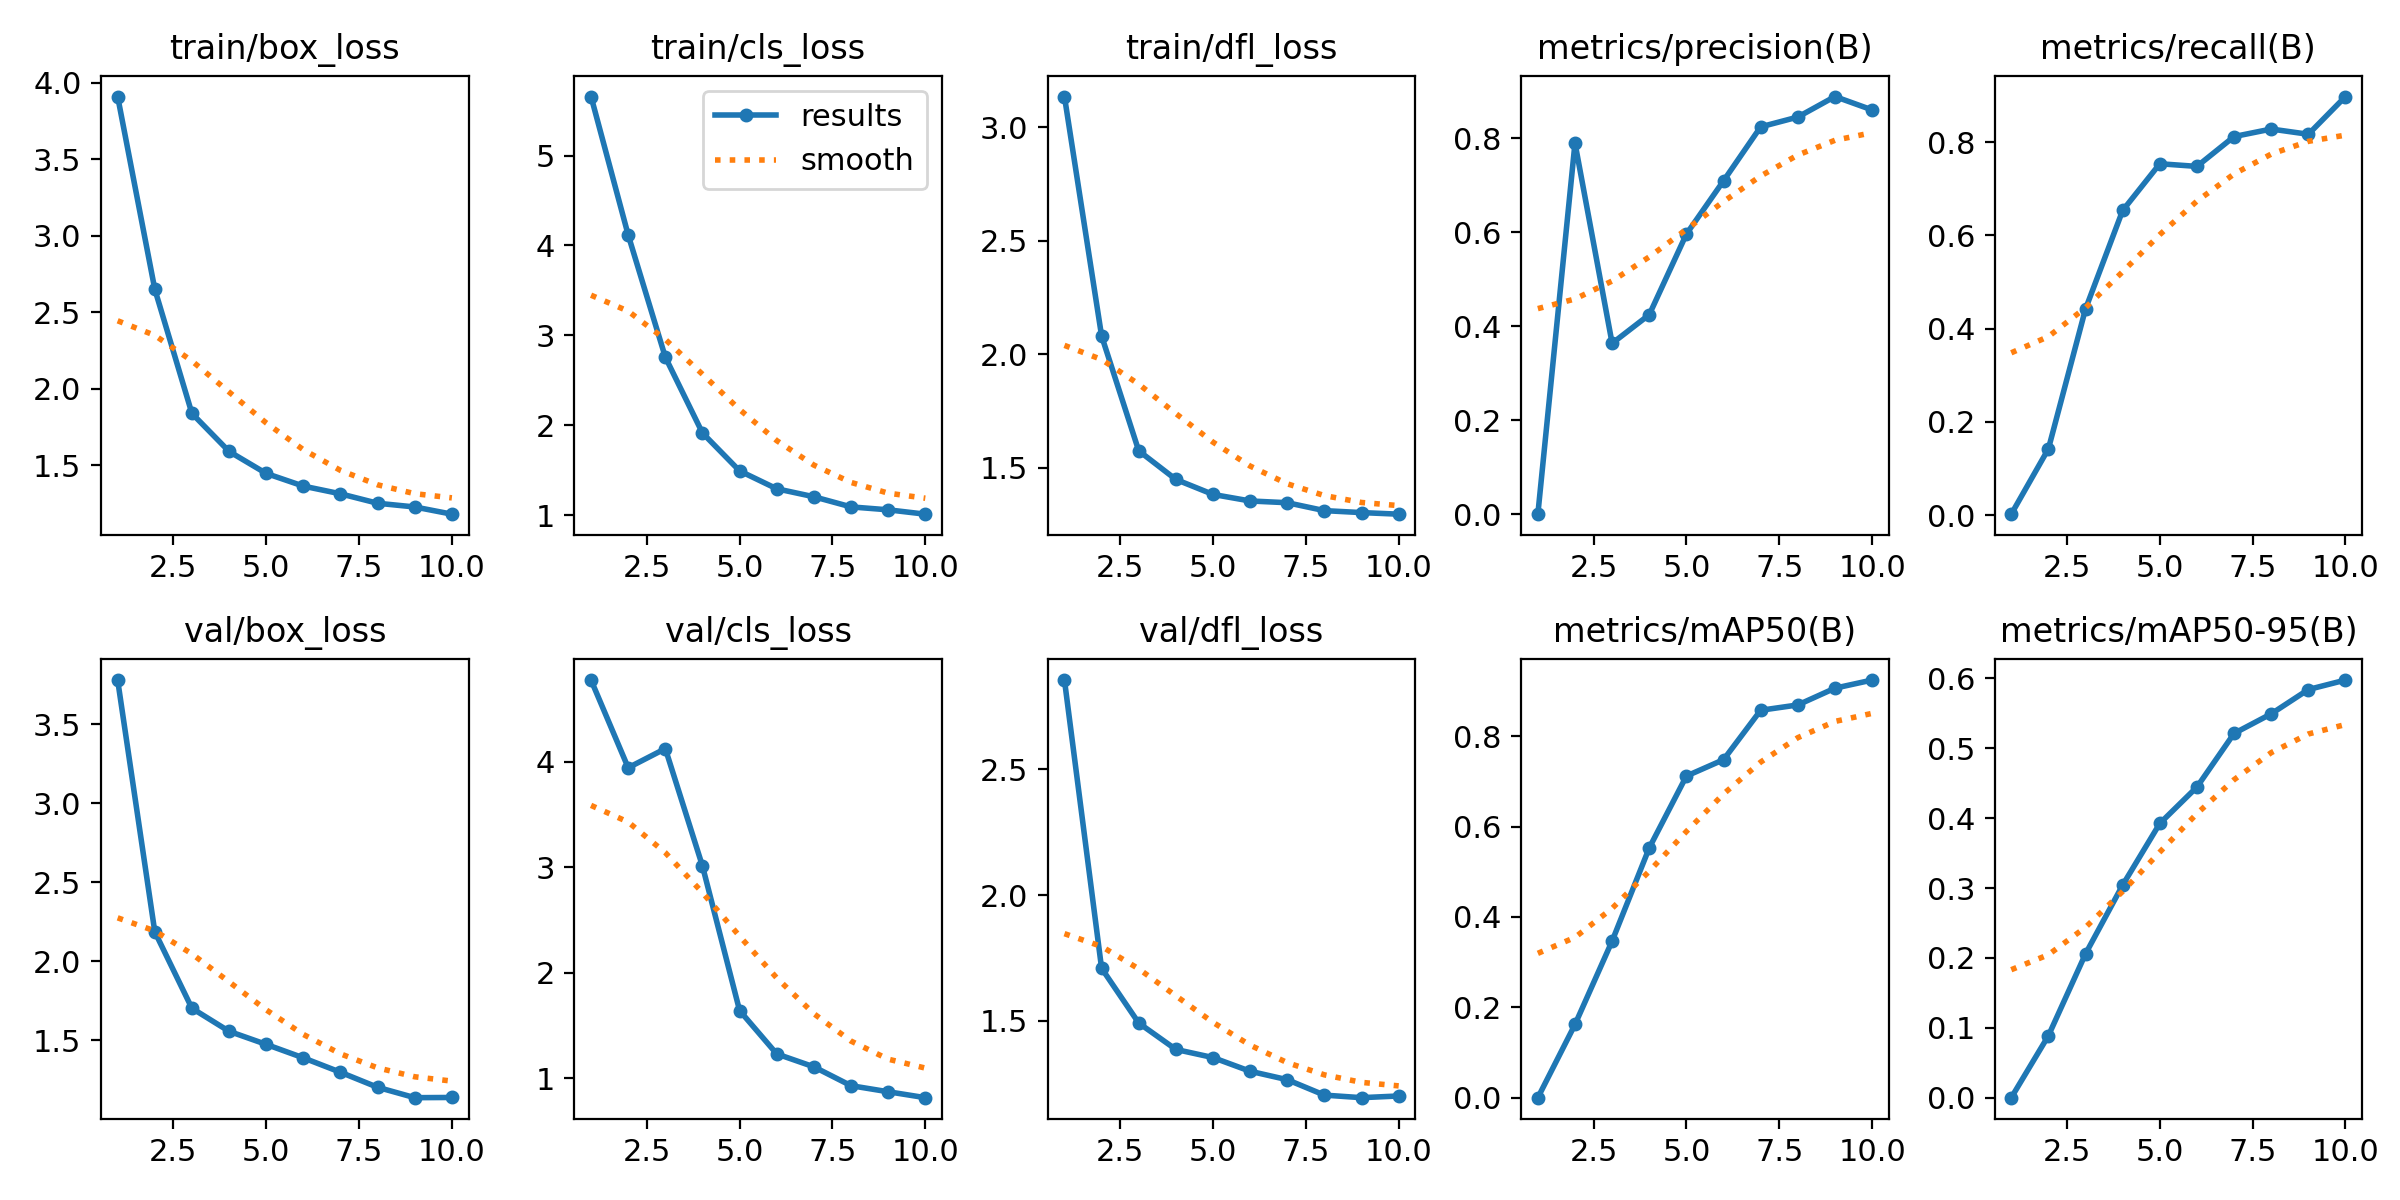

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

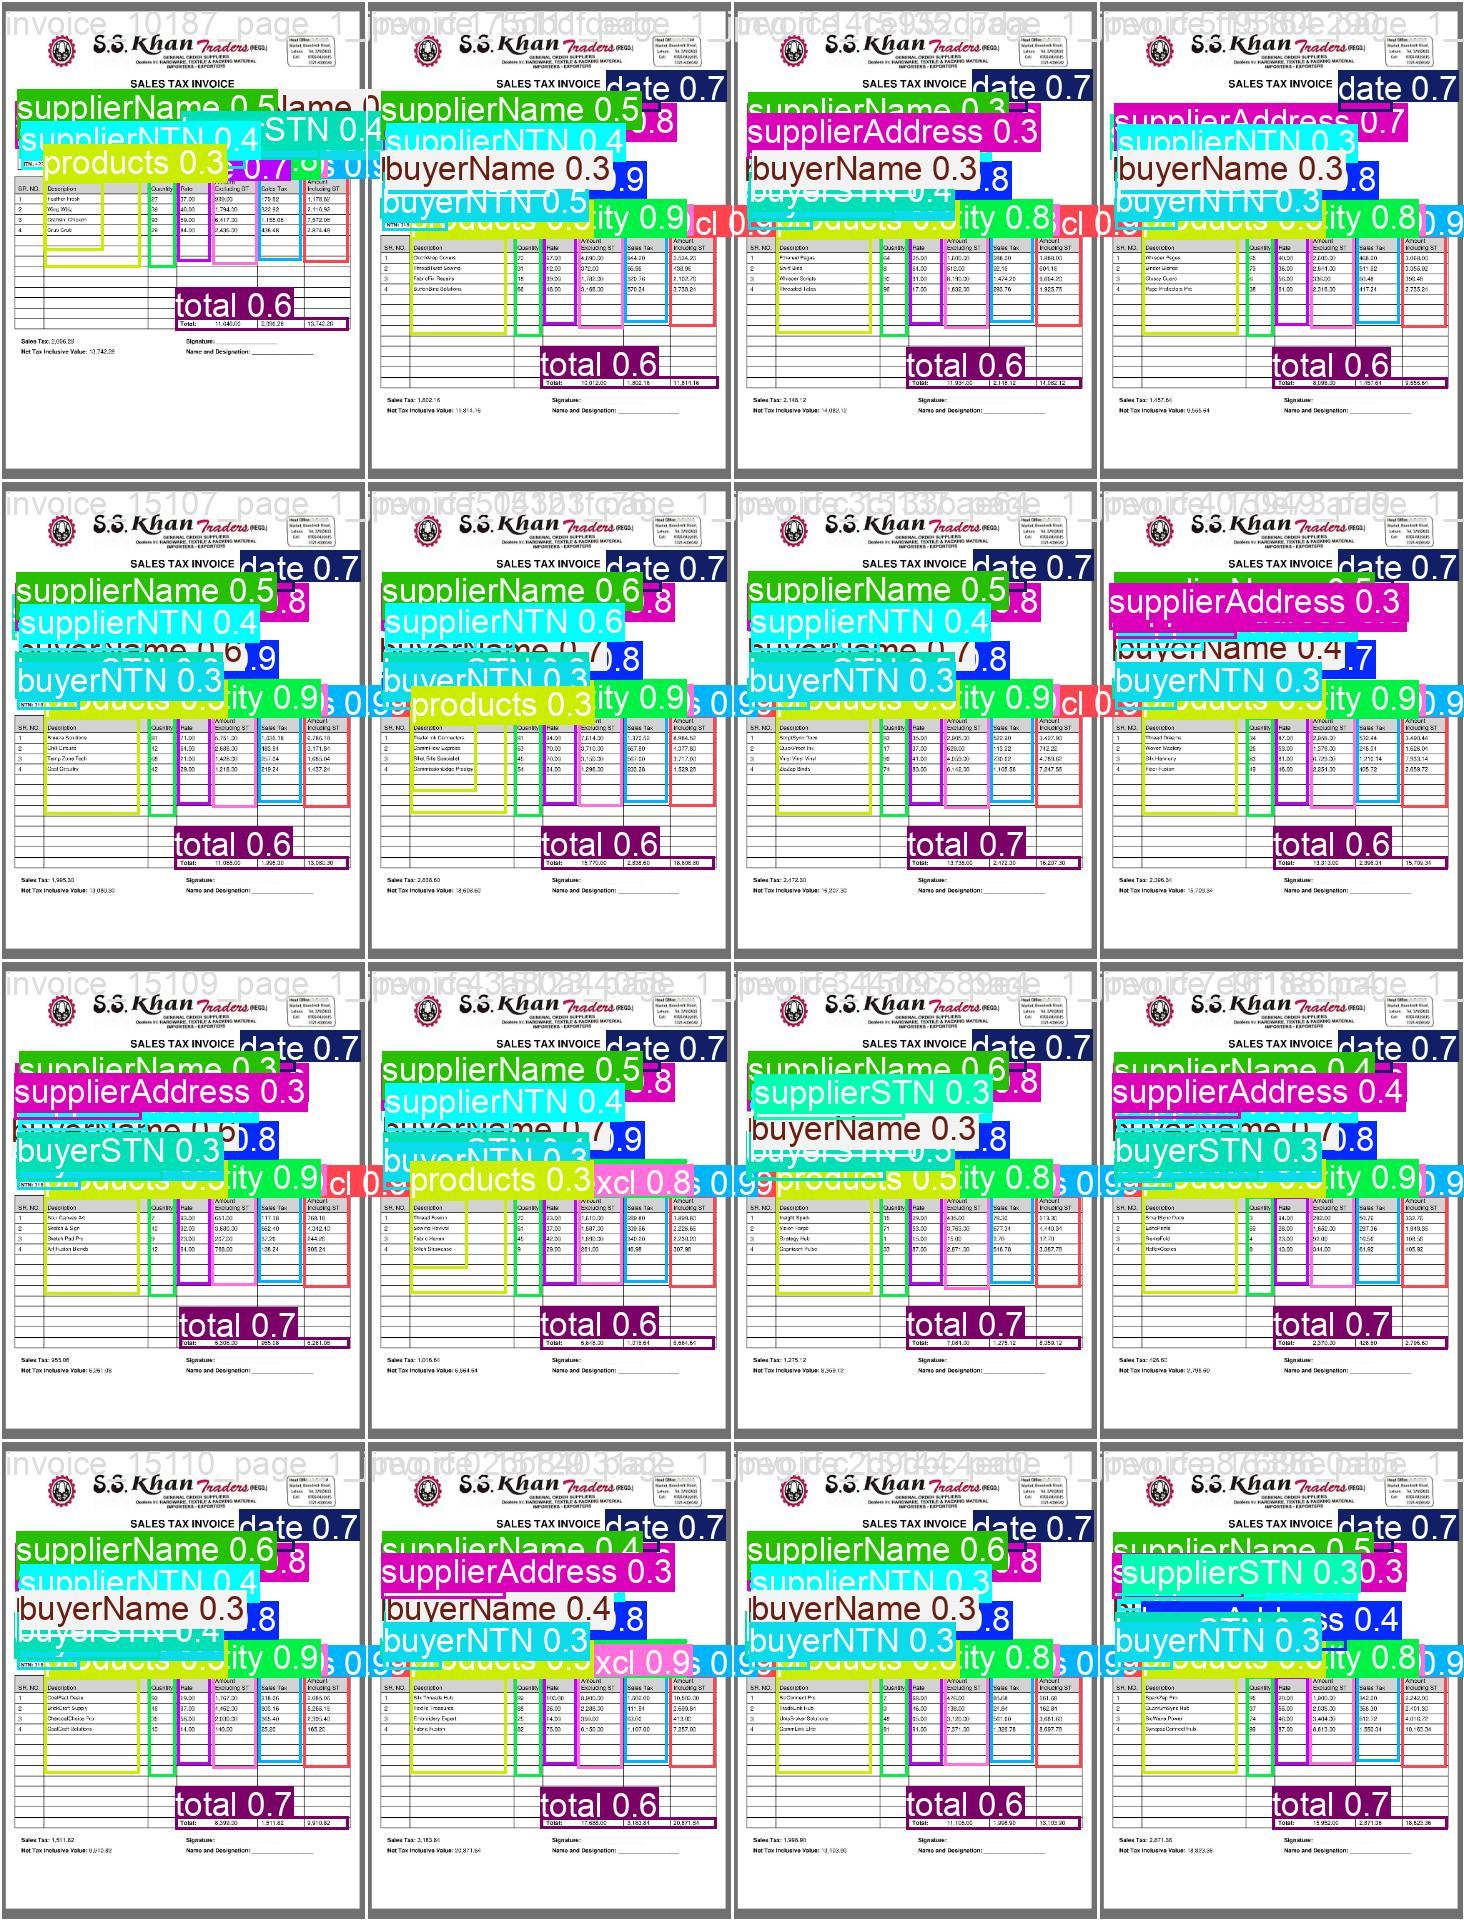

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,419,379 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/CVIP-5/valid/labels.cache... 48 images, 0 backgrounds, 0 corrupt: 100% 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.26s/it]
                   all         48        760      0.859      0.897      0.923      0.598
          buyerAddress         48         48      0.838      0.979      0.955      0.581
              buyerNTN         47         48      0.874       0.75      0.806      0.398
             buyerName         48         48      0.778      0.958      0.973      0.385
              buyerSTN         48         49      0.573       0.98      0.978      0.601
                  date         34         34      0.805      0.973      0.863      0.569
                  excl         48         48      

In [12]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.19 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,419,379 parameters, 0 gradients, 21.3 GFLOPs

image 1/26 /content/datasets/CVIP-5/test/images/invoice_11378_page_1_jpeg.rf.607678dcdcccfe2f23e3d40e5244e485.jpg: 640x512 1 buyerAddress, 1 buyerNTN, 1 buyerName, 1 buyerSTN, 1 excl, 1 incl, 2 productss, 1 quantity, 1 rate, 1 sales, 1 supplierAddress, 1 supplierNTN, 1 supplierName, 1 supplierSTN, 1 total, 48.7ms
image 2/26 /content/datasets/CVIP-5/test/images/invoice_13131_page_1_jpeg.rf.07ccd8c0baacefcb707be8a09e5969c2.jpg: 640x512 2 buyerAddresss, 1 buyerNTN, 2 buyerNames, 1 buyerSTN, 1 date, 1 excl, 1 incl, 2 productss, 1 quantity, 1 rate, 1 sales, 2 supplierAddresss, 1 supplierNTN, 1 supplierName, 1 supplierSTN, 12.4ms
image 3/26 /content/datasets/CVIP-5/test/images/invoice_13967_page_1_jpeg.rf.a9b82637f5d7e20f9ce8d104b875dff8.jpg: 640x512 1 buyerAddress, 1 buyerNTN, 1 buyerName, 1 buyerSTN, 1 date, 1 excl, 1 incl, 1

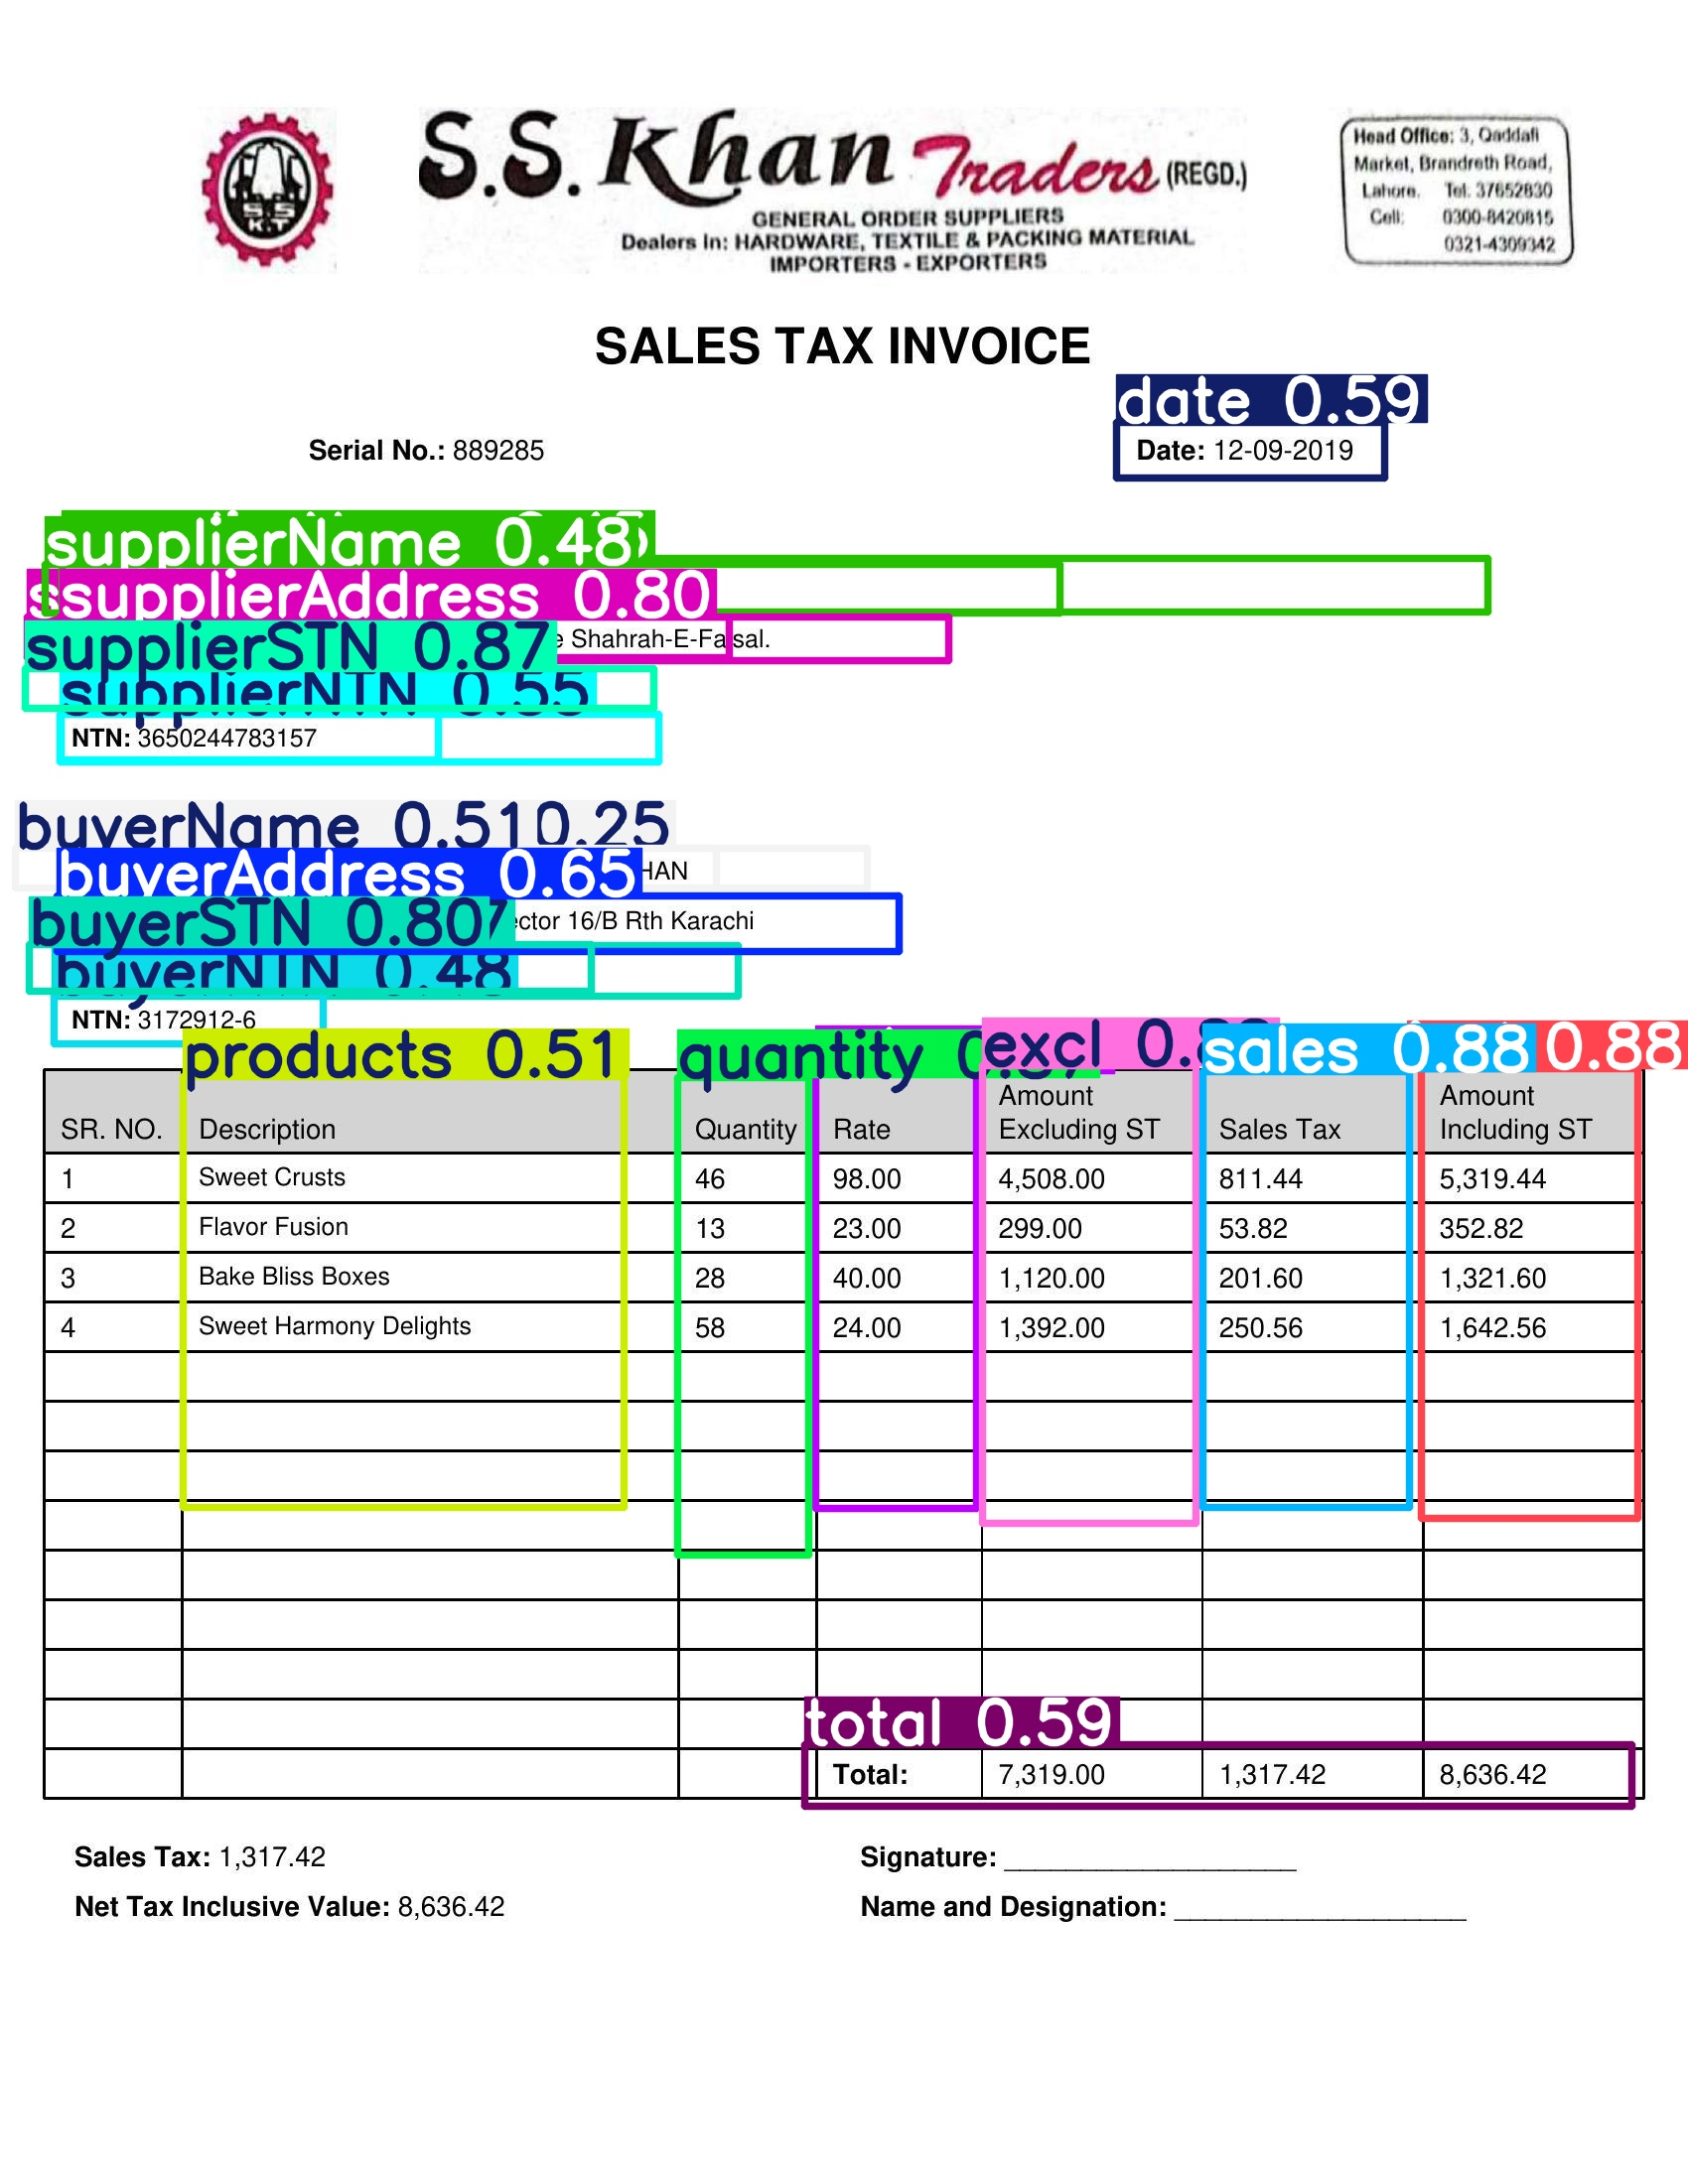

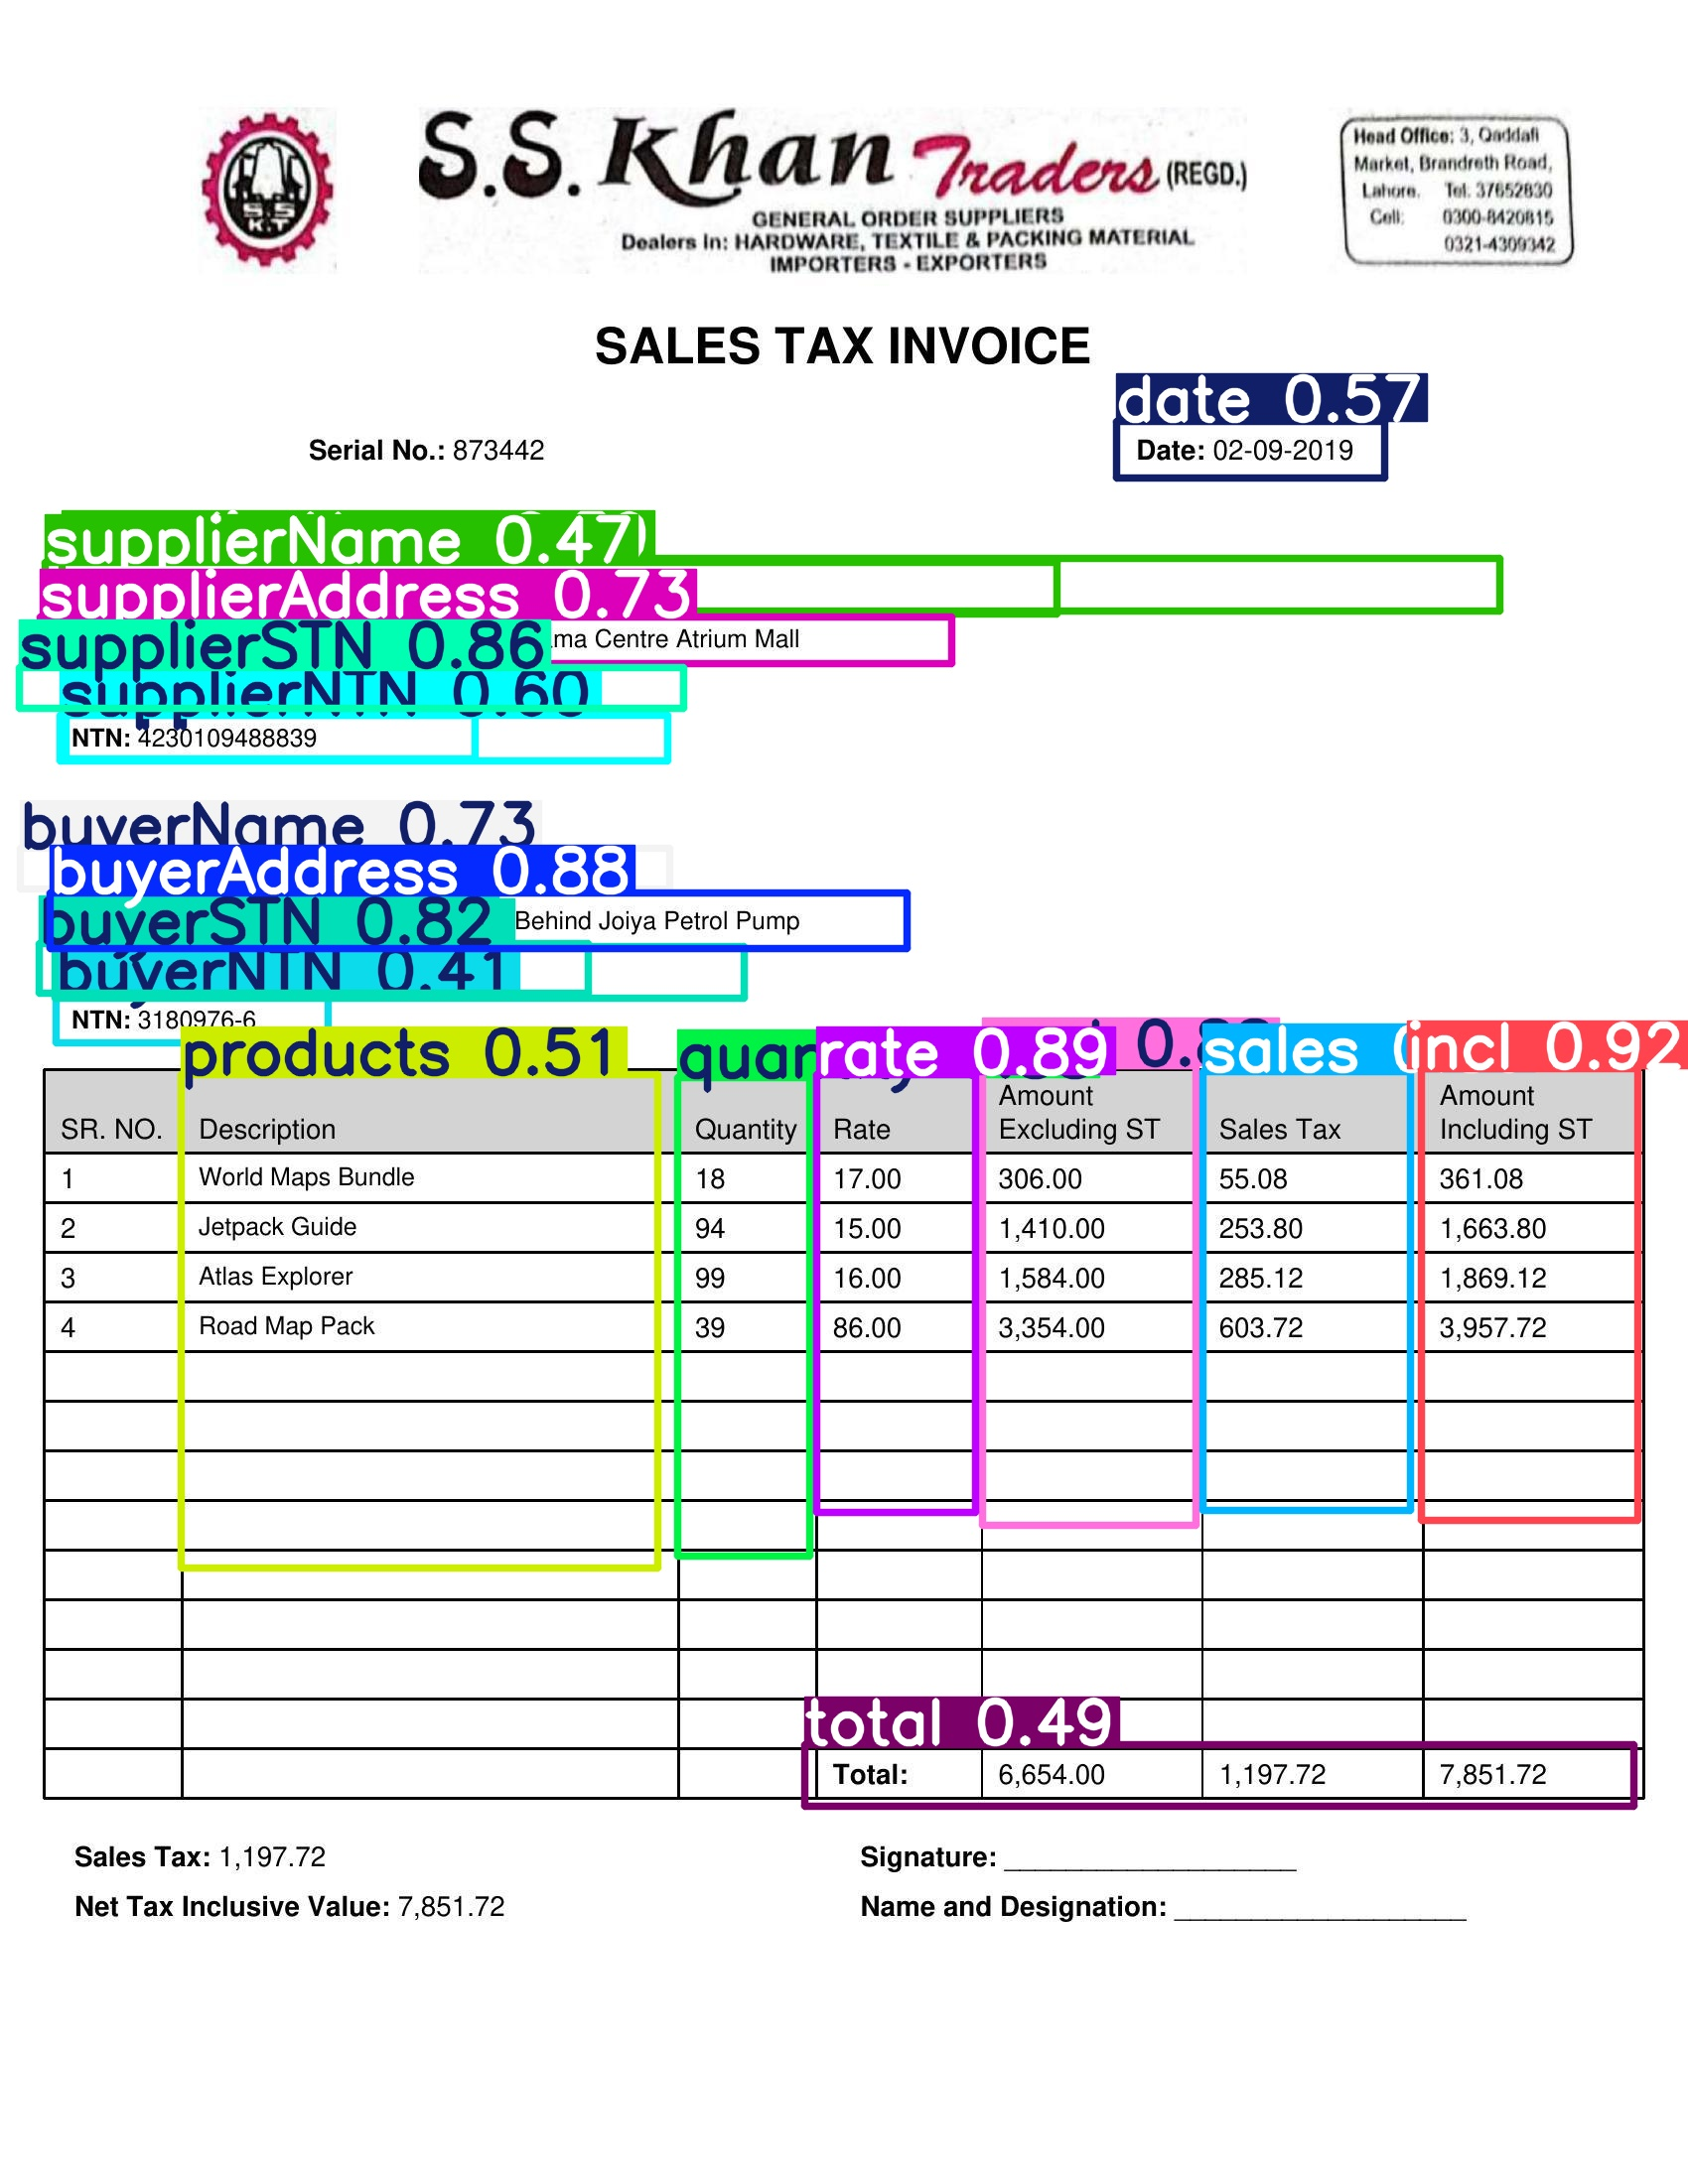

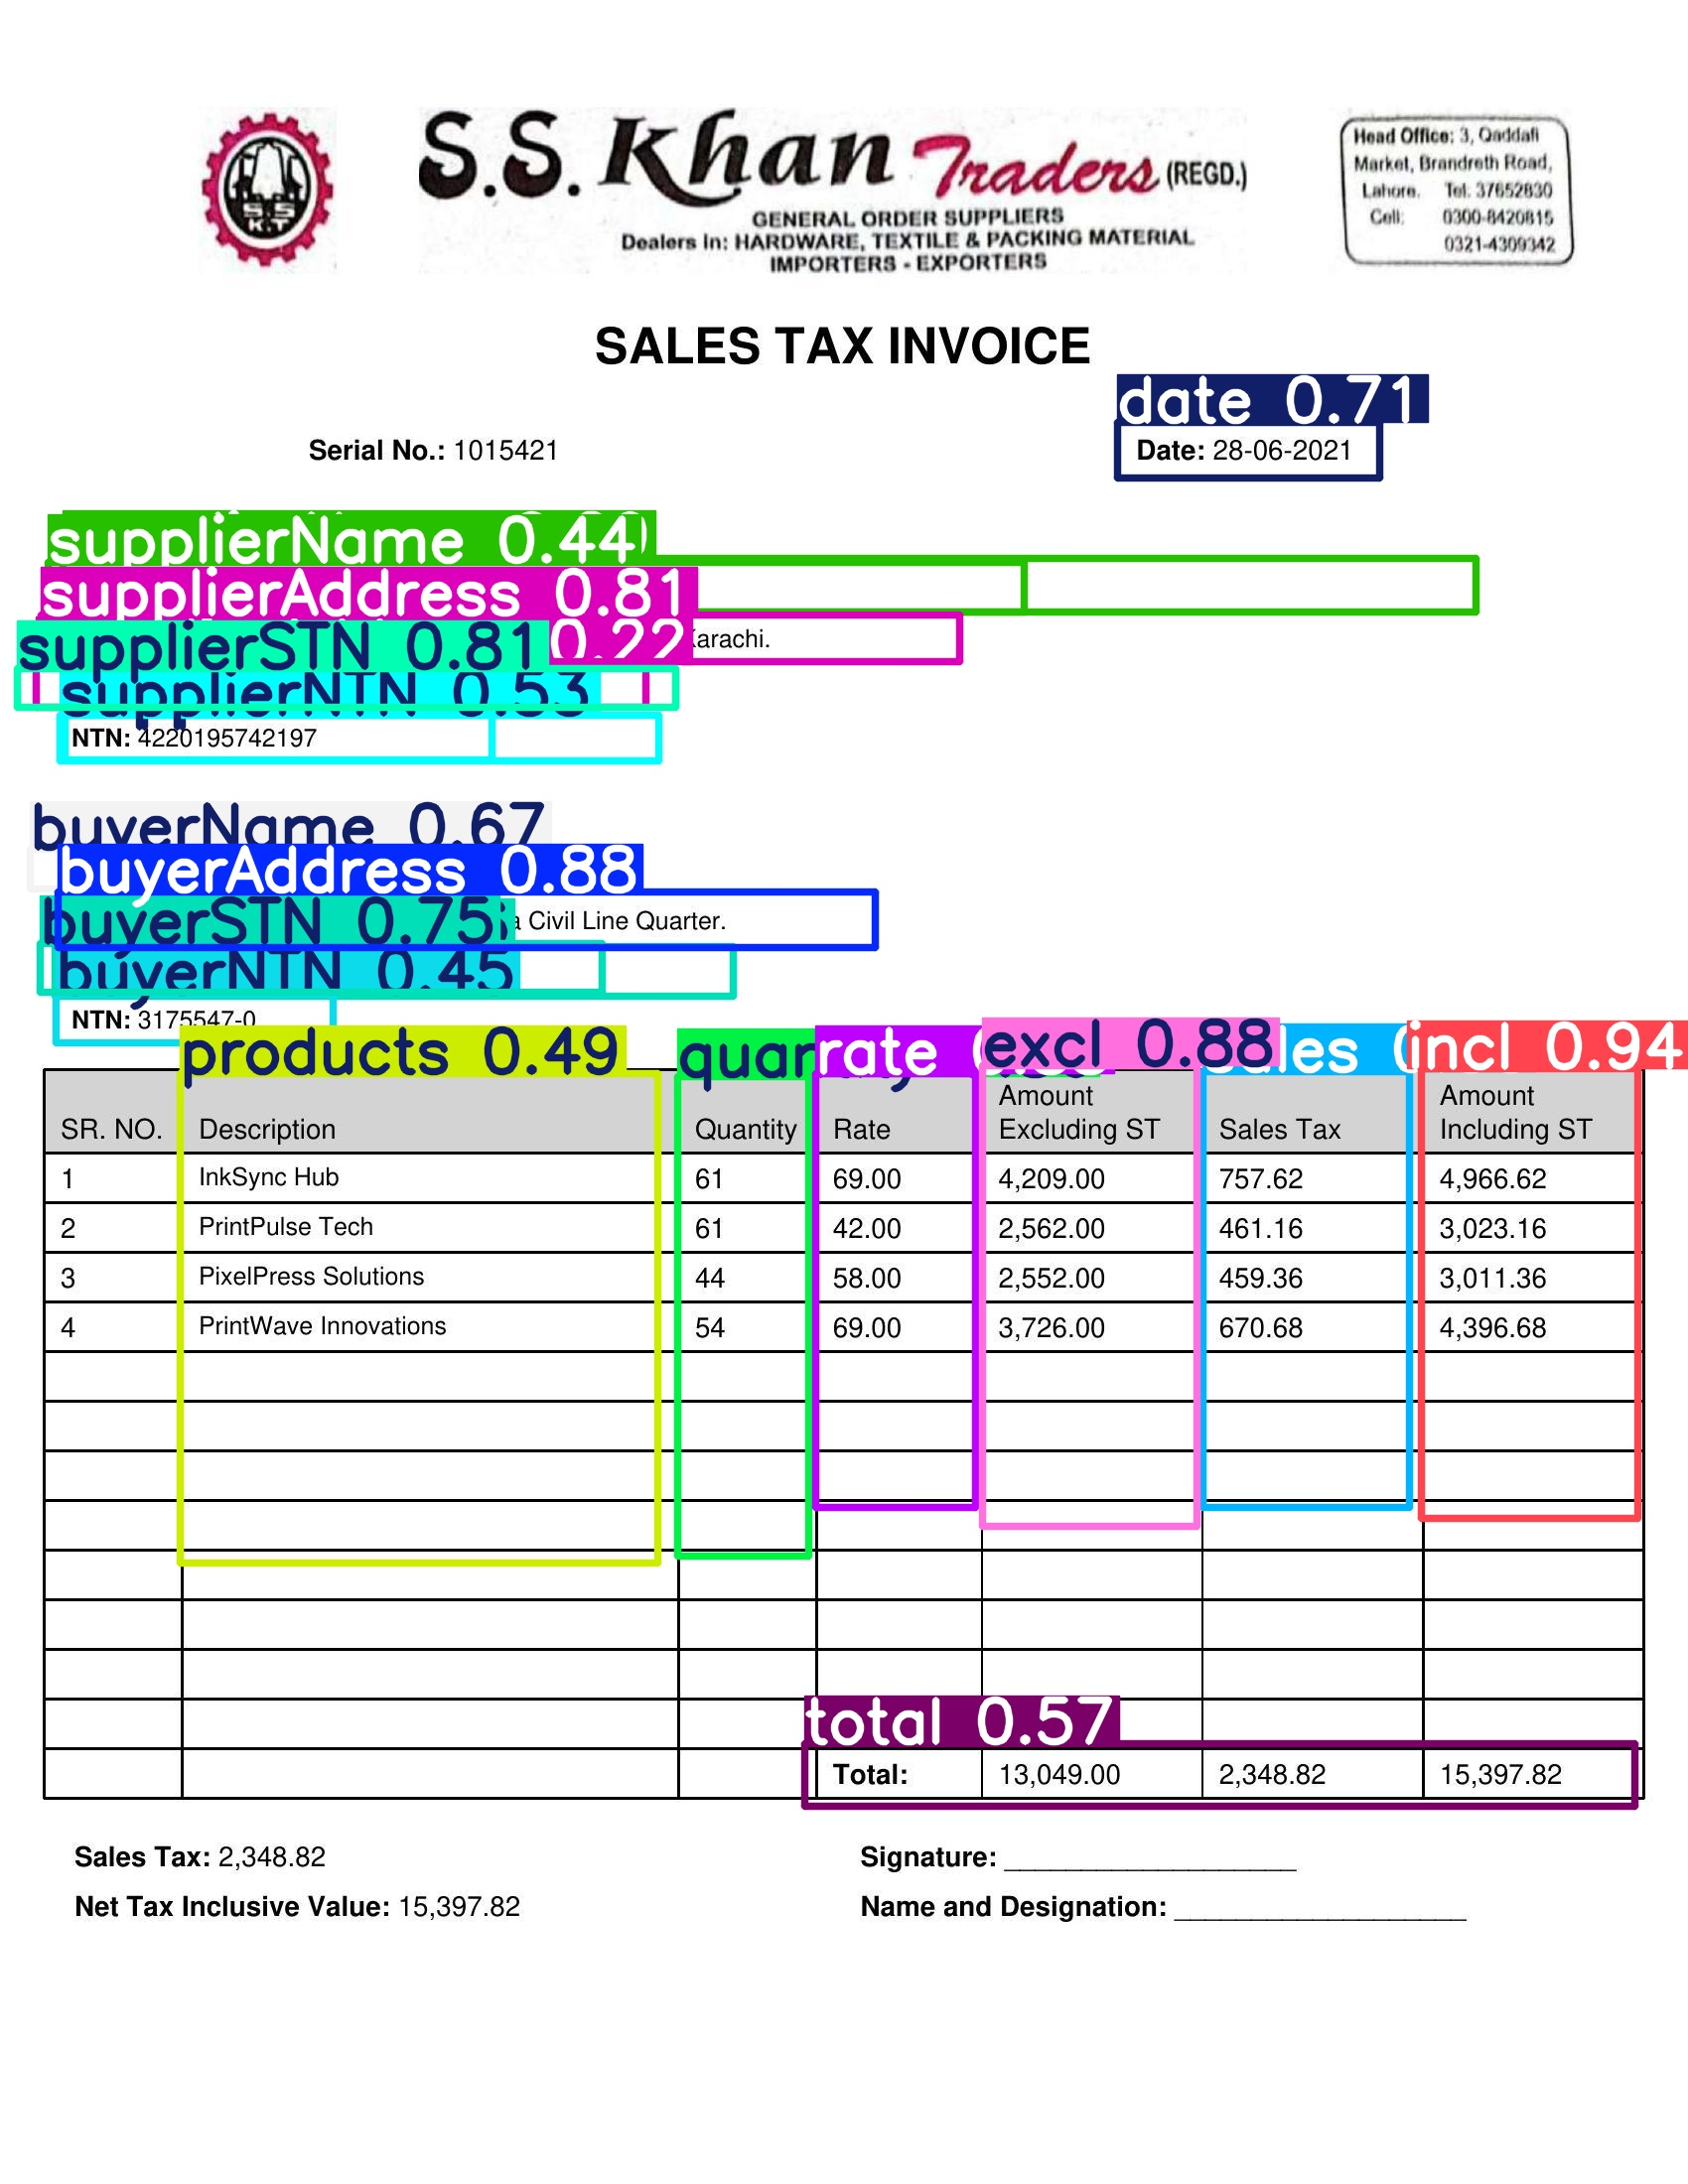

In [13]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")